In [76]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Perceptron
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import os

### Conjunto de datos para el ejercicio 1

#### Generar el conjunto de datos sintéticos de acuerdo a como se indicó en el apartado 6.2.1

In [77]:
X, y = make_blobs(n_samples=60, centers=[(-7,-7), (-2,10), (5,2)], n_features=2, random_state=0)

#### Dividir el conjunto de datos en entrenamiento (70%) y test (30%)

In [78]:
train_df_x, test_df_x, train_df_y, test_df_y = train_test_split(X,y, train_size=0.7, random_state=False, stratify=y)

#### Obtener un clasificador lineal con el método Perceptrón.

In [79]:
perceptron = Perceptron()
perceptron.fit(train_df_x, train_df_y)
x = perceptron.decision_function([[0, 0], [1, 1], [0.5, 0.5]])

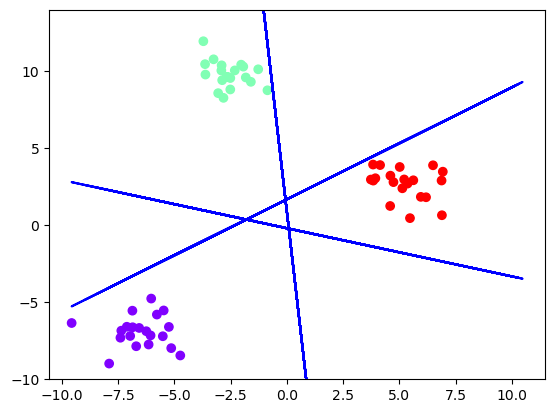

In [80]:
coefs = perceptron.coef_
intercept = perceptron.intercept_
x = train_df_x
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='rainbow')
for i, coef in enumerate(coefs):
    plt.plot(x, (-(coef[0]/coef[1])*x) -(intercept[i]/coef[1]), color='blue')
plt.axis('tight')
plt.ylim(-10, 14)
plt.show()

#### Obtener un clasificador lineal mediante Regresión Logística

In [81]:
logistic = LogisticRegression()
logistic.fit(train_df_x, train_df_y)
x = perceptron.decision_function([[0, 0], [1, 1], [0.5, 0.5]])

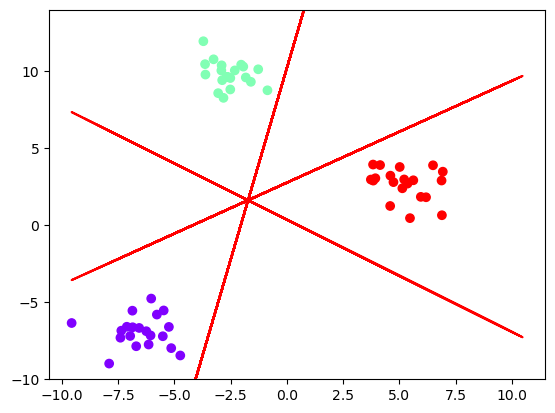

In [91]:
coefs = logistic.coef_
intercept = logistic.intercept_
x = train_df_x
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='rainbow')
for i, coef in enumerate(coefs):
    plt.plot(x, (-(coef[0]/coef[1])*x) -(intercept[i]/coef[1]), color='red')
plt.axis('tight')
plt.ylim(-10, 14)
plt.show()

#### Mostrar en el mismo gráfico: las muestras con las que se entrenó los modelos, las superficies de decisión obtenidas con el Perceptrón (líneas azules) y las superficies de decisión obtenidas mediante Regresión Logística (líneas rojas).

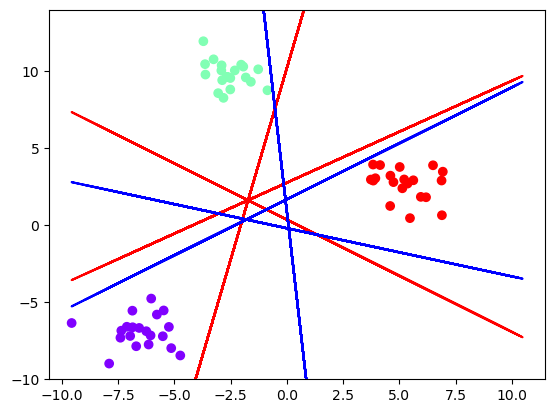

In [83]:
coefs = logistic.coef_
intercept = logistic.intercept_
x = train_df_x
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='rainbow')
for i, coef in enumerate(coefs):
    plt.plot(x, (-(coef[0]/coef[1])*x) -(intercept[i]/coef[1]), color='red')

coefs = perceptron.coef_
intercept = perceptron.intercept_
for i, coef in enumerate(coefs):
    plt.plot(x, (-(coef[0]/coef[1])*x) -(intercept[i]/coef[1]), color='blue')
plt.axis('tight')
plt.ylim(-10, 14)
plt.show()

Después de haber entrenado un clasificador utilizando el modelo perceptrón y otro utilizando el modelo logístico, se puede observar que ambos clasificadores separan las muestras correctamente. Sin embargo, el clasificador entrenado mediante el modelo logístico presenta una menor margen de error, ya que su región de indeterminación es el punto de corte entre las tres rectas. Mientras que, el clasificador entrenado con el modelo perceptrón tiene una región de indeterminación más amplia.

### Ejercicio 2: Implementar un clasificador de sexo basado en la imagen de la cara

#### Leer el conjunto de entrenamiento y de test de los archivos `CelebA-10K-train.csv` y `CelebA-10K-test.csv` respectivamente.

In [84]:
CelebA_train = pd.read_csv('CelebA-10K-train.csv')
CelebA_test = pd.read_csv('CelebA-10K-test.csv')

#### Entrenar un clasificador lineal biclásico utilizando el método de Regresión Logística.

In [85]:
lr_CelebA = LogisticRegression(random_state = 0)
lr_CelebA.fit(CelebA_train.iloc[:,2:], CelebA_train.iloc[:,1:2])

c:\Users\0scar RR\anaconda3\envs\aedv\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(random_state=0)

#### Obtener la tasa de acierto del clasificador en las muestras del conjunto de test.

In [93]:
yhat = lr_CelebA.predict(CelebA_test.iloc[:,2:])
accuracy = accuracy_score(CelebA_test.iloc[:,1:2], yhat)
print(f'La tasa de acierto es de {accuracy*100:.2f}%')

La tasa de acierto es de 91.26%


#### Clasificar las imágenes que están en el archivo comprimido ImagenesParaClasificar.zip que se encuentra en el github de las prácticas de la asignatura y cuyas características están en el conjunto de datos de test CelebA-10K-test.csv, indicando cuales de ellas las clasifica incorrectamente el clasificador.

In [87]:
path = './ImagenesParaClasificar'
files = os.listdir(path)

In [88]:
images = pd.DataFrame()
images = CelebA_test[CelebA_test['Image_name'].isin(files)]

In [89]:
results = lr_CelebA.predict(images.iloc[:,2:])
for i, image in enumerate(files):
    print(f'La imagen {image} es {results[i]}')

La imagen 000038.jpg es female
La imagen 000047.jpg es male
La imagen 000082.jpg es male
La imagen 000220.jpg es female
La imagen 000595.jpg es female
La imagen 000767.jpg es male
La imagen 001182.jpg es female
La imagen 002185.jpg es female


In [94]:
accuracy_img = accuracy_score(images.iloc[:,1:2], results)
print(f'La tasa de acierto es de {accuracy_img*100:.2f}%')

La tasa de acierto es de 50.00%
